
#### Teoría de Circuitos II

#  Tarea Semanal 3
#### Autor: Federico Rodriguez Vizzon
<img src="./ned.jpeg" align="left" width="150" /> 


## 1) Hallar la funcion transferencia que cumple con la plantilla utilizando parte de funcion.

<img src="./plantilla.png" align="left" width="400" /> 
  
<img src="./restricciones.png" align="left" width="200" /> 


Partiendo de $\mid T(j\omega)\mid^2 = \frac{1}{1 + \epsilon^2 \omega^{2n}}$

$\mid\alpha(\omega)\mid = \frac{1}{\mid T(j\omega)\mid} = (1 + \epsilon^2 \omega^{2n})^{\frac{1}{2}}$

$\mid\alpha(\omega)\mid dB = 20 \log{(1 + \epsilon^2 \omega^{2n})^{\frac{1}{2}}} = 10 \log{(1 + \epsilon^2 \omega^{2n})^{\frac{1}{2}}} $

$\omega_p = 2\pi f_p = 2\pi1500Hz$

$\omega_s = 2\pi f_s = 2\pi3000Hz$

Adoptamos como norma de frecuencia $\Omega_{\omega} = \omega_p$ y asi nos queda:

$\omega_p = \frac{2\pi f_p}{2\pi f_p} = 1$ 

$\omega_s = \frac{2\pi f_s}{2\pi f_p} = \frac{2\pi 3000}{2\pi 1500} = 2$ 

Para $\omega = \omega_p = 1 \implies \mid \alpha(1)\mid = 1 = 10 \log{(1 + \epsilon^2\omega^{2n})} = 10 \log{(1 + \epsilon^2 1^{2n})} = 10 \log{(1 + \epsilon^2)}$ = 1

operando

$\epsilon^2 = 10^{\frac{1}{10}} -1$


In [22]:
epsilon_2 = (10**(1/10) -1)
epsilon = np.sqrt(epsilon_2)
print("epsilon^2 = ", epsilon_2)
print("epsilon = ", epsilon)

epsilon^2 =  0.2589254117941673
epsilon =  0.5088471399095875


Procedemos a calcular el orden del filtro, para ello calculamos $\mid\alpha(\omega_s)\mid = \mid\alpha(2)\mid$ iterando el valor de n hasta obtener un valor de $\alpha$ que cumpla con la plantilla

$\mid\alpha(2)\mid = 10 \log{(1 + \epsilon^2\omega^{2n})} = 10 \log{(1 + 0.258 \times{2^{2n}})}$

In [23]:
alpha_1 = 10*np.log10(1+(epsilon_2*2**2))
alpha_2 = 10*np.log10(1+(epsilon_2*2**4))
alpha_3 = 10*np.log10(1+(epsilon_2*2**6))
print("alpha_1",alpha_1)
print("alpha_2",alpha_2)
print("alpha_3",alpha_3)

alpha_1 3.0871412804611125
alpha_2 7.1120019162871175
alpha_3 12.448020734217447


| n        | $\alpha$ |
| -------- | -------- |
| 1 | 3.08    |
| 2 | 7.12    |
| 3 | 12.44   |

Adoptamos n = 3 que es el menor orden que cumple con la plantilla.

Planteamos la transferencia para un orden 3.

$\mid T(j\omega)\mid^2 = \frac{1}{1 + \epsilon^2 \omega^{2n}} = \frac{1}{1 + \epsilon^2 \omega^{2\times{3}}} = \frac{1}{1 + \epsilon^2 \omega^{6}}$

Reemplazamos $\omega = \frac{s}{j}$ y obtenemos $\mid T(s)\mid^2 = \frac{1}{1 + \epsilon^2 \frac{s}{j}^{6}} = \frac{1}{1 + \epsilon^2 (\frac{s}{j})^{6}} = \frac{1}{1 - \epsilon^2 s^{6}}$ operando una vez mas dejamos la transferencia en forma monica $\mid T(s)\mid^2 = \frac{\frac{1}{\epsilon^2}}{\frac{1}{\epsilon^2} - s^6}$

Recordando que $\mid T(s)\mid^2 = T(s)T(-s) = \frac{\frac{1}{\epsilon^2}}{\frac{1}{\epsilon^2} - s^6} = \frac{c}{s^3 + s^2a + bs +c} \frac{c}{-s^3 + s^2a -bs +c}$

A simple vista se observa que $c^2 = \frac{1}{\epsilon^2}$

Ahora igualamos los denominadores y operamos solo con ellos para simplificar los calculos

$\frac{1}{\epsilon^2} - s^6 = (s^3 + s^2a bs +c)(-s^3 + s^2a -bs +c) = -s^6 + s^5(a -a) + s^4(-b+a^2-b) +s^3(c-ab+ab-c )+ s^2(ac-b^2+ac) + s(bc-bc) + c^2$ 

Los terminos de orden impar se cancelan en forma directa 

$s^5(a -a) = 0$ 

$s^3(c-ab+ab-c) = 0$

$s(bc-bc) = 0$

Ahora para cumplir con $\frac{1}{\epsilon^2} - s^6$ los terminos $s^4$ y $s^2$ tambien se deben cancelar

$s^4(-b+a^2-b) = 0 \implies a^2 = 2b \implies b = \frac{a^2}{2}$ (1)

$s^2(ac-b^2+ac) = 0 \implies 2ac -b^2 = 0 \implies 2ac = b^2$ (2)

Reemplazando (1) en (2)

$2ac = (\frac{a^2}{2})^2 = \frac{a^4}{4} \implies c = \frac{a^3}{8} \implies a = (8c)^\frac{1}{3}$ (3)

Al anularse lo terminos $s^5$, $s^4$, $s^3$, $s^2$, $s$ podemos escribir

$\frac{1}{\epsilon^2} - s^6 = -s^6 + c^2$

igualando termino a termino 

$\frac{1}{\epsilon^2} = c^2$ (4)(consistente con lo planteado en el numerador.)

$-s^6 = -s^6$

Calculamos los valores de a, b y c utilazando las ecuacionnes (1), (3) y (4)

$c = \frac{1}{\epsilon}$

$a = (8c)^\frac{1}{3}$

$b = \frac{a^2}{2}$

Ahora podemos escribir la funcion transferencia en funcion de a,b,c

$T(s) = \frac{c}{s^3 + s^2a +bs +c}$


In [24]:
c = 1/epsilon
a = (8*c)**(1/3)
b = (a**2)/2
print("a = ", a)
print("b = ", b)
print("c = ", c)

a =  2.5051527763620527
b =  3.1378952164572502
c =  1.9652267283602716


Reemplazando por los valores obtenidos:

$T(s) = \frac{1.97}{s^3 + s^2.5 +s3.14 +1.97}$

Calculamos la raices del polinomio numerador obtenido y lo comparamos con las raizes del polinomio numerador $\frac{1}{\epsilon^2} -s^6$

In [25]:
roots_1 =np.roots([-1, 0, 0, 0, 0, 0, (1/epsilon_2)])
roots_2 =np.roots([1, a, b, c])
print(roots_1)
print(roots_2)

[-1.25257639+0.j         -0.62628819+1.08476297j -0.62628819-1.08476297j
  1.25257639+0.j          0.62628819+1.08476297j  0.62628819-1.08476297j]
[-1.25257639+0.j         -0.62628819+1.08476297j -0.62628819-1.08476297j]


Si solo nos quedamos con las raices que estan en el semi plano izquierdo observamos que son la mismas que las raices que encontramos para el polinomio obtenido aplicando parte de funcion.

Tranferencia aproximada y diagrama de polos y ceros.

 <img src="./roots_ac.jpg" align="left" width="600" /> 

In [26]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [27]:

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 14
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


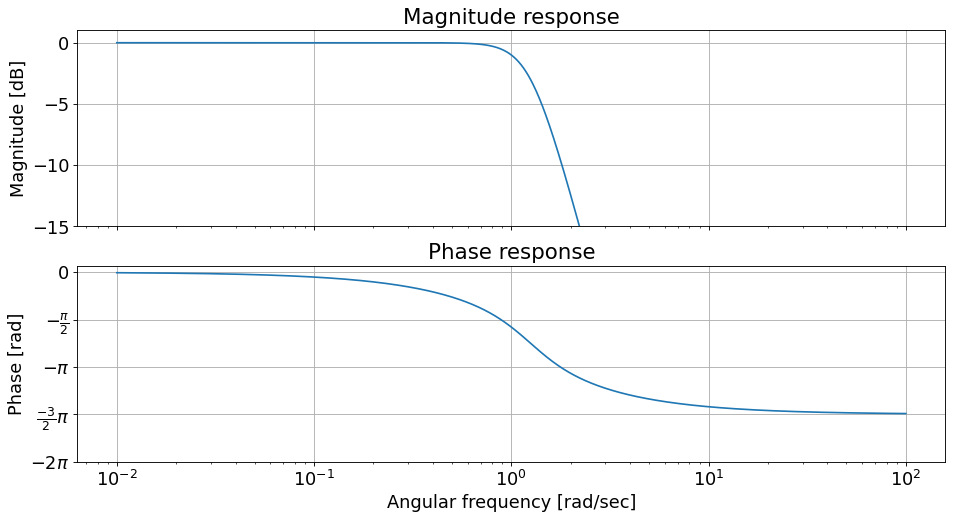

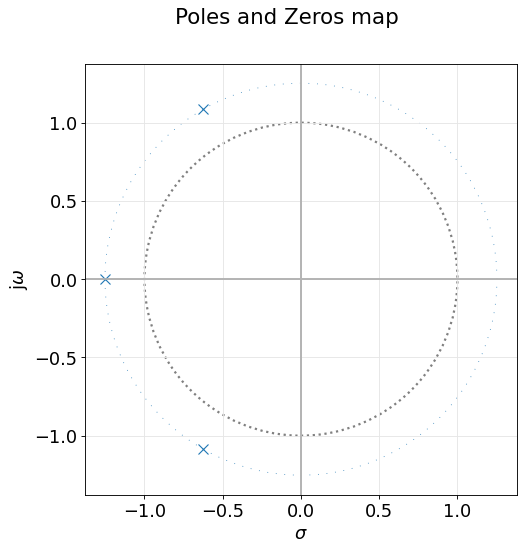

In [33]:
     
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################
# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ c])
den = np.array([ 1, a, b, c])

H1 = sig.TransferFunction( num, den )
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-15,1])

plt.gca

pzmap(H1)

plt.show()

## Implementacion con elementos pasivos separados por un Buffer 

Con los polos obtenidos anteriomente reescribimos la $T(s)$

 <img src="./filtroPasivo1.jpg" align="left" width="600" /> 
 <img src="./filtroPasivo2.jpg" align="left" width="600" /> 
